### Exercici 1 (Nivell 1)
#### Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

In [1]:
#importing python libraries and modules

#libraries & modules
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing
from sklearn.tree import DecisionTreeClassifier #classification algorithm
from sklearn.neighbors import KNeighborsClassifier #classification algorith
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV #optimization parameter algorithm
from sklearn.model_selection import cross_val_score #cross validation algorithm
from sklearn.model_selection import train_test_split #train test split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix #metrics tool
from sklearn.metrics import classification_report #metrics tool
from sklearn.preprocessing import StandardScaler #feature engineering tool

warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df_flight = pd.read_csv('DelayedFlights.csv', index_col=0)

In [3]:
#dataset information

print(df_flight.info(null_counts=True))
df_flight.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1936758 non-null  int64  
 1   Month              1936758 non-null  int64  
 2   DayofMonth         1936758 non-null  int64  
 3   DayOfWeek          1936758 non-null  int64  
 4   DepTime            1936758 non-null  float64
 5   CRSDepTime         1936758 non-null  int64  
 6   ArrTime            1929648 non-null  float64
 7   CRSArrTime         1936758 non-null  int64  
 8   UniqueCarrier      1936758 non-null  object 
 9   FlightNum          1936758 non-null  int64  
 10  TailNum            1936753 non-null  object 
 11  ActualElapsedTime  1928371 non-null  float64
 12  CRSElapsedTime     1936560 non-null  float64
 13  AirTime            1928371 non-null  float64
 14  ArrDelay           1928371 non-null  float64
 15  DepDelay           1936758 non-n

,count,mean,std,min,25%,50%,75%,max
Year,1936758.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1936758.0,6.111106,3.482546,1.0,3.0,6.0,9.0,12.0
DayofMonth,1936758.0,15.753470,8.776272,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1936758.0,3.984827,1.995966,1.0,2.0,4.0,6.0,7.0
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.263236,1944.702250,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1928371.0,133.305863,72.060069,14.0,80.0,116.0,165.0,1114.0


#### Dataset Explanation

1. Year: 2008
2. Month: 1-12
3. DayofMonth: 1-31
4. DayOfWeek: 1 (Monday) - 7 (Sunday)
5. DepTime: actual departure time (local, hhmm)
6. CRSDepTime: scheduled departure time (local, hhmm)
6. ArrTime: actual arrival time (local, hhmm)
6. CRSArrTime: scheduled arrival time (local, hhmm)
6. UniqueCarrier: unique carrier code
6. FlightNum: flight number
6. TailNum: plane tail number: aircraft registration, unique aircraft identifier
6. ActualElapsedTime: in minutes
6. CRSElapsedTime: in minutes
6. AirTime: in minutes
6. ArrDelay: arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
6. DepDelay: departure delay, in minutes
6. Origin: origin IATA airport code
6. Dest: destination IATA airport code
6. Distance: in miles
6. TaxiIn: taxi in time (the movement of an aircraft on the ground after landing), in minutes
6. TaxiOut: taxi out time (the movement of an aircraft on the ground before taking off), in minutes
6. Cancelled: 1 = yes, 0 = no
6. CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
6. Diverted: 1 = yes, 0 = no
6. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
6. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
6. NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
6. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
6. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

#### Conclusions from dataset:
- Columns with information of Delay (CarrierDelay, WeatherDelay, NASDelay, SecurityDealy, LateAircraftDelay) contain a lot of NaN values. Mainly these NaN values are when a flight is on time, and then these features remain empty. We can change these fields with a 0 to avoid errors on the algorithms.
- if we need more feature as a predictors, we should convert object types (5) from categorical to numerical using one-hot enconding or other algorithm for this purpose.

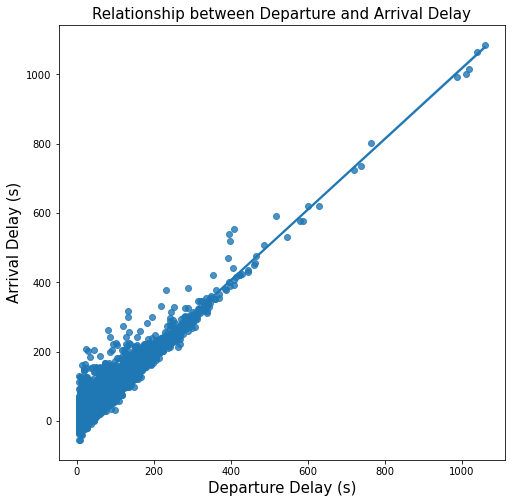

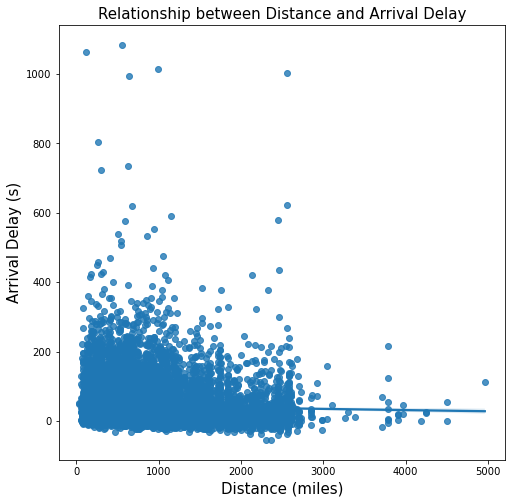

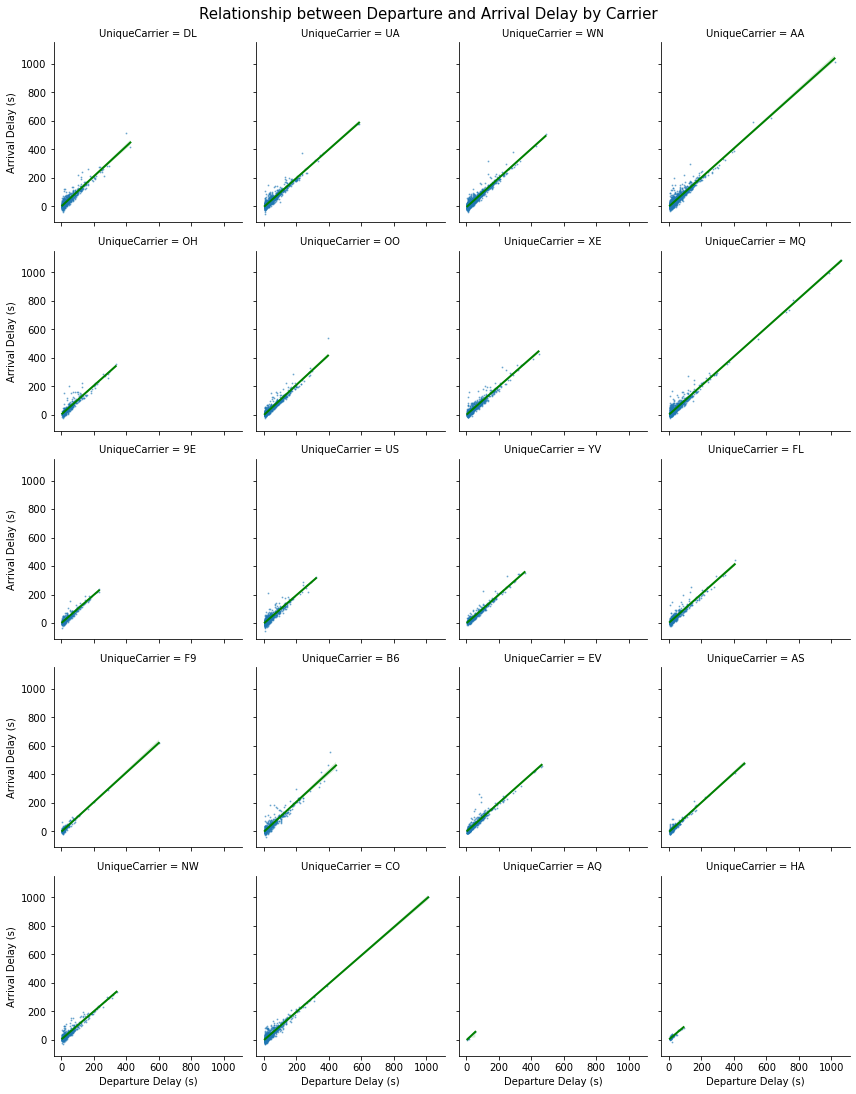

In [4]:
#plotting

#we take a sample to speed up plotting
df_flight_plt = df_flight.sample(15000)

fig1, ax1 = plt.subplots(figsize=(8,8))
fig1 = sns.regplot(x="DepDelay", y="ArrDelay", data=df_flight_plt)
ax1.set_title("Relationship between Departure and Arrival Delay", fontsize=15)
ax1.set_xlabel("Departure Delay (s)", fontsize=15)
ax1.set_ylabel("Arrival Delay (s)", fontsize=15)

fig2, ax2 = plt.subplots(figsize=(8,8))
fig2 = sns.regplot(x="Distance", y="ArrDelay", data=df_flight_plt)
ax2.set_title("Relationship between Distance and Arrival Delay", fontsize=15)
ax2.set_xlabel("Distance (miles)", fontsize=15)
ax2.set_ylabel("Arrival Delay (s)", fontsize=15)

fig3 = sns.lmplot(x="DepDelay", y="ArrDelay", col="UniqueCarrier", data=df_flight_plt, 
                  col_wrap=4, height=3, scatter_kws={'s': 0.8, 'alpha': 0.5}, line_kws={'lw': 2, 'color': 'green'})
fig3.fig.suptitle('Relationship between Departure and Arrival Delay by Carrier', fontsize=15, y=1.01)
fig3.set_axis_labels("Departure Delay (s)", "Arrival Delay (s)")


#### Conclusions from plotting: 
- It is clear a linear relationship between delay at departure and arribal
- Distance does not have relationship with delay at arribal
- Carriers have the same relationship between delay at departure and arribal, but  some of them have bigger delays

### Pre-Processing

- Some features and observations does not give useful information. They will be deleted.
- We will replace NaN values to 0 in the 'xxxDelay' columns because all their NaN values are from empty fields when the flight is on time.

#### Observations to delete
- all flights cancelled (column 'Cancelled' = 1)
- all flights diverted (column 'Diverted' = 1)

#### Features to remove
- column 'Cancelled'
- column 'Diverted'
- column 'Year'
- column 'CancellationCode'

#### NaN values replaces by 0
- column 'CarrierDelay'
- column 'WeatherDelay'
- column 'NASDelay'
- column 'SecurityDelay'
- column 'LateAircraftDelay'

#### New class column

We create a new column 'Delayed' for classification purposes where:
- Flight delayed = 1
- Flight on time = 0

#### Data unbalanced

Distribution of classes:
- Flight delayed = 1723415
- Flight on time =  204956

Data is unbalanced, we will apply a disproportionate sample of 200.000 in order to have data balanced and better predictions



In [5]:
#I have use this code to study this dataframe (unique values and NaN values)
#column_name = 'CarrierDelay'
#print(df_flight_pre[column_name].value_counts())
#print('nan values: ',pd.isnull(df_flight_pre[column_name]).sum())

In [6]:
#pre-processing

df_flight = pd.read_csv('DelayedFlights.csv', index_col=0)

#we make a copy to apply pre-processing
df_flight_pre = df_flight

#replacing NaN values to 0
columns = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df_flight_pre[columns] = df_flight_pre[columns].fillna(0)

#adding a new column 'Delayed' for classes
df_flight_pre.loc[df_flight_pre['ArrDelay'] > 0, 'Delayed'] = 1
df_flight_pre.loc[df_flight_pre['ArrDelay'] <= 0, 'Delayed'] = 0

#removing observations that are not useful
df_flight_pre.drop(df_flight_pre[df_flight_pre['Cancelled'] == 1].index, inplace=True)
df_flight_pre.drop(df_flight_pre[df_flight_pre['Diverted'] == 1].index, inplace=True)

#removing features that are not useful
columns = ['Year','Cancelled', 'Diverted', 'CancellationCode']
df_flight_pre.drop(columns=columns, inplace=True)

#checking if classes are unbalanced
#print(df_flight_pre['Delayed'].value_counts())
#checking classes after sample
#print(df_flight_pre['Delayed'].value_counts())

#we applied the method sample disproportionate to each stratum
sample_stratum = 200000
df_flight_pre = df_flight_pre.groupby('Delayed', group_keys=False).apply(lambda x: x.sample(sample_stratum))

- We select predictors and target.

In [7]:
#selecting variables X (aka predictors, independent or feature)
#selecting variable y (aka target or dependant)
predictors = ['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime',
             'FlightNum', 'ActualElapsedTime','CRSElapsedTime',
              'AirTime','DepDelay','Distance','TaxiIn','TaxiOut',
              'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
              'LateAircraftDelay']
target =['Delayed']

X = df_flight_pre[predictors]
y = df_flight_pre[target]

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=1)

#### Selection of Classification Models:
- Model 1: Decision Tree Classifier
- Model 2: K Neighbors Classifier
- Model 3: Logistic Regression

In [8]:
#classification models

model_1 = DecisionTreeClassifier().fit(X_train, y_train)
model_2 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
model_3 = LogisticRegression().fit(X_train, y_train)

model1 = 'Decision Tree Classifier'
model2 = 'K Neighbors Classifier'
model3 = 'Logistic Regression'

In [9]:
#model 1 Decision Tree Classifier

#we obtain predicted values from test data
y_pred1 = model_1.predict(X_test)

#Accuracy
acc1 = round(metrics.accuracy_score(y_test, y_pred1),3)

#Confusion Matrix
confMatrix1 = confusion_matrix(y_test, y_pred1)

TN1 = confMatrix1[0,0]
TP1 = confMatrix1[1,1]
FN1 = confMatrix1[1,0]
FP1 = confMatrix1[0,1]

#Other metrics
target_names = ['On Time (0)', 'Delayed (1)']
classReport1 = classification_report(y_test, y_pred1, target_names=target_names, output_dict=True)

pre1 = round(classReport1['Delayed (1)'].get('precision'),3)
sen1 = round(classReport1['Delayed (1)'].get('recall'),3)
f1s1 = round(classReport1['Delayed (1)'].get('f1-score'),3)
spe1 = round(classReport1['On Time (0)'].get('recall'),3)

In [10]:
#model 2 K Neighbors Classifier

#we obtain predicted values from test data
y_pred2 = model_2.predict(X_test)

#Accuracy
acc2 = round(metrics.accuracy_score(y_test, y_pred2),3)

#Confusion Matrix
confMatrix2 = confusion_matrix(y_test, y_pred2)

TN2 = confMatrix2[0,0]
TP2 = confMatrix2[1,1]
FN2 = confMatrix2[1,0]
FP2 = confMatrix2[0,1]

#Other metrics
target_names = ['On Time (0)', 'Delayed (1)']
classReport2 = classification_report(y_test, y_pred2, target_names=target_names, output_dict=True)

pre2 = round(classReport2['Delayed (1)'].get('precision'),3)
sen2 = round(classReport2['Delayed (1)'].get('recall'),3)
f1s2 = round(classReport2['Delayed (1)'].get('f1-score'),3)
spe2 = round(classReport2['On Time (0)'].get('recall'),3)

In [11]:
#model 3 Logistic Regression

#we obtain predicted values from test data
y_pred3 = model_3.predict(X_test)

#Accuracy
acc3 = round(metrics.accuracy_score(y_test, y_pred3),3)

#Confusion Matrix
confMatrix3 = confusion_matrix(y_test, y_pred3)

TN3 = confMatrix3[0,0]
TP3 = confMatrix3[1,1]
FN3 = confMatrix3[1,0]
FP3 = confMatrix3[0,1]

#Other metrics
target_names = ['On Time (0)', 'Delayed (1)']
classReport3 = classification_report(y_test, y_pred3, target_names=target_names, output_dict=True)

pre3 = round(classReport3['Delayed (1)'].get('precision'),3)
sen3 = round(classReport3['Delayed (1)'].get('recall'),3)
f1s3 = round(classReport3['Delayed (1)'].get('f1-score'),3)
spe3 = round(classReport3['On Time (0)'].get('recall'),3)

### Exercici 2 (Nivell 1)
#### Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

#### Main Metrics:

Where:
- P: condition positive (real positive cases)
- N: condition negative (real negative cases)
- TP: True Positive (hit)
- TN: True Negative (correct rejection)
- FP: False Positive (type I error)
- FN: False Negative (type II error)

Metrics:
- Accuracy: (TP+TN)/(P+N)
- Precision or PPV (Positive predictive value): TP/(TP+FP)
- F1 Score: Harmonic mean of Precision and Recall 2TP/(2TP+FP+FN)
- Sensitivity or Recall or TPR (True positive rate): TP/(TP+FN)
- Specifity or TNR (True negative rate): TN/(TN+FP)

Classes
- Flight On Time = 0
- Flight Delayed = 1

## Comparative Table

| Model | Predicted (On Time) | Predicted (Delayed) | 
| ----------- | ----------- | ----------- |
| Actual (On Time) | TN | FP |  
| Actual (Delayed) | FN | TP |  


| {{model1}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN1}} | {{FP1}} |  
| Actual (1) | {{FN1}} | {{TP1}} |  

| {{model2}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN2}} | {{FP2}} |  
| Actual (1) | {{FN2}} | {{TP2}} |  

| {{model3}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN3}} | {{FP3}} |  
| Actual (1) | {{FN3}} | {{TP3}} |  


| Model | Accuracy | Precision | F1 Score | Sensitivity | Specifity | 
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | 
| {{model1}} | {{acc1}} | {{pre1}} | {{f1s1}} | {{sen1}} | {{spe1}} | 
| {{model2}} | {{acc2}} | {{pre2}} | {{f1s2}} | {{sen2}} | {{spe2}} | 
| {{model3}} | {{acc3}} | {{pre3}} | {{f1s3}} | {{sen3}} | {{spe3}} | 

### Conclusions:
- Best results are very similar in Decision Tree Classifier and Logistic Regression.
- Considering all general metrics Logistic Regression is better.
- But, in the case we consider that is better to have more FP (predict to have a flight delayed but finally arribing on-time) than FN, then the Decision Tree Classifier is the best one.


### Exercici 3 (Nivell 1)
#### Entrena’ls utilitzant els diferents paràmetres que admeten.

In [12]:
#parameters for Model 1
print(model1)
print('\nDefault Parameters:')
print(model_1.get_params())

#training model 1
model_1_est = DecisionTreeClassifier(random_state=0)

#selection of parameters and creating a dict for grid tool
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']

param_grid1 = dict(criterion=criterion, splitter=splitter, max_features=max_features)

#launching grid tool
model_1_grid = GridSearchCV(estimator=model_1_est, param_grid=param_grid1, 
                            scoring='accuracy', n_jobs=-1)
model_1_result = model_1_grid.fit(X_train, y_train)

#results
acc1_hyper = round(model_1_result.best_score_,3)
print('\nBest Parameters:\n ', model_1_result.best_params_)

Decision Tree Classifier

Default Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Best Parameters:
  {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [13]:
#parameters for Model 2
print(model2)
print('\nDefault Parameters:')
print(model_2.get_params())

#training model 2
model_2_est = KNeighborsClassifier()

#selection of parameters and creating a dict for grid tool
weights = ['uniform','distance']
algorithm = ['ball_tree', 'kd_tree']
n_neighbors = [5, 10]

param_grid2 = dict(weights=weights, algorithm=algorithm, n_neighbors=n_neighbors)

#launching grid tool
model_2_grid = GridSearchCV(estimator=model_2_est, param_grid=param_grid2, 
                            scoring='accuracy', n_jobs=-1)
model_2_result = model_2_grid.fit(X_train, y_train)

#results
acc2_hyper = round(model_2_result.best_score_,3)
print('\nBest Parameters:\n ', model_2_result.best_params_)

K Neighbors Classifier

Default Parameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Best Parameters:
  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


In [14]:
#parameters for Model 3
print(model3)
print('\nDefault Parameters:')
print(model_3.get_params())

#training model 3
model_3_est = LogisticRegression()

#selection of parameters and creating a dict for grid tool
penalty = ['l2','elasticnet']
solver = ['newton-cg', 'sag']
C = [10, 0.1]

param_grid3 = dict(penalty=penalty, solver=solver, C=C)

#launching grid tool
model_3_grid = GridSearchCV(estimator=model_3_est, param_grid=param_grid3, 
                            scoring='accuracy', n_jobs=-1)
model_3_result = model_3_grid.fit(X_train, y_train)

#results
acc3_hyper = round(model_3_result.best_score_,3)
print('\nBest Parameters:\n ', model_3_result.best_params_)

Logistic Regression

Default Parameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Best Parameters:
  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


### Comparative Table

| Model | Accuracy | Accuracy (hypertuned) |  
| ----------- | ----------- | ----------- |  
| {{model1}} | {{acc1}} | {{acc1_hyper}} |  
| {{model2}} | {{acc2}} | {{acc2_hyper}} |  
| {{model3}} | {{acc3}} | {{acc3_hyper}} |  

### Conclusions:
- This methods takes a lot of computing time. We must be careful when choosing parameters to apply.
- Logistic regression has improve a lot with the new parameters.

### Exercici 4 (Nivell 1)
#### Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

In [15]:
model1_cross = cross_val_score(model_1_est, X, y, scoring='accuracy')
model2_cross = cross_val_score(model_2_est, X, y, scoring='accuracy')
model3_cross = cross_val_score(model_3_est, X, y, scoring='accuracy')

### Comparative Table

| Model | Accuracy | Accuracy (cross validation cv=5) |  
| ----------- | ----------- | ----------- |  
| {{model1}} | {{acc1}} | {{model1_cross}} |  
| {{model2}} | {{acc2}} | {{model2_cross}} |  
| {{model3}} | {{acc3}} | {{model3_cross}} |  

### Conclusions:
- Decision Tree and K Neighbors improve with cross-validation. 
- Logistic Regression has very similar results

### Exercici 5 (Nivell 2)
#### Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.

We will apply feature scaling to standardize data so that the scale of each variable is the same. 
If the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude.

In [16]:
#selecting predictors X and target y
predictors = ['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime',
             'FlightNum', 'ActualElapsedTime','CRSElapsedTime',
              'AirTime','DepDelay','Distance','TaxiIn','TaxiOut',
              'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
              'LateAircraftDelay']
target =['Delayed']

X = df_flight_pre[predictors]
y = df_flight_pre[target]

#applying feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=1)

model_1sc = DecisionTreeClassifier().fit(X_train, y_train)
model_2sc = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
model_3sc = LogisticRegression().fit(X_train, y_train)

In [17]:
#we obtain predicted values from test data
y_pred1sc = model_1sc.predict(X_test)
y_pred2sc = model_2sc.predict(X_test)
y_pred3sc = model_3sc.predict(X_test)

#Accuracy
acc4 = round(metrics.accuracy_score(y_test, y_pred1sc),3)
acc5 = round(metrics.accuracy_score(y_test, y_pred2sc),3)
acc6 = round(metrics.accuracy_score(y_test, y_pred3sc),3)

#Confusion Matrix
confMatrix4 = confusion_matrix(y_test, y_pred1sc)
confMatrix5 = confusion_matrix(y_test, y_pred2sc)
confMatrix6 = confusion_matrix(y_test, y_pred3sc)

TN4 = confMatrix4[0,0]
TP4 = confMatrix4[1,1]
FN4 = confMatrix4[1,0]
FP4 = confMatrix4[0,1]

TN5 = confMatrix5[0,0]
TP5 = confMatrix5[1,1]
FN5 = confMatrix5[1,0]
FP5 = confMatrix5[0,1]

TN6 = confMatrix6[0,0]
TP6 = confMatrix6[1,1]
FN6 = confMatrix6[1,0]
FP6 = confMatrix6[0,1]

## Comparative Table 

| {{model1}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN1}} | {{FP1}} |  
| Actual (1) | {{FN1}} | {{TP1}} | 

| {{model1}} (scaler) | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN4}} | {{FP4}} |  
| Actual (1) | {{FN4}} | {{TP4}} |  

| {{model2}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN2}} | {{FP2}} |  
| Actual (1) | {{FN2}} | {{TP2}} |  

| {{model2}} (scaler) | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN5}} | {{FP5}} |  
| Actual (1) | {{FN5}} | {{TP5}} |  

| {{model3}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN3}} | {{FP3}} |  
| Actual (1) | {{FN3}} | {{TP3}} |  

| {{model3}} (scaler) | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN6}} | {{FP6}} |  
| Actual (1) | {{FN6}} | {{TP6}} | 

| Model | Accuracy | Accuracy (scaler) | 
| ----------- | ----------- | ----------- |
| {{model1}} | {{acc1}} | {{acc4}} | 
| {{model2}} | {{acc2}} | {{acc5}} | 
| {{model3}} | {{acc3}} | {{acc6}} |

### Conclusions:

- Results are very similar, it is worth it because improves the algorithm performance.

### Exercici 6 (Nivell 3)
#### No utilitzis la variable DepDelay a l’hora de fer prediccions.

We will delete the 'DepDelay' from the predictors, and compare results

In [18]:
#selecting predictors X and target y
predictors = ['Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime',
             'FlightNum', 'ActualElapsedTime','CRSElapsedTime',
              'AirTime','Distance','TaxiIn','TaxiOut',
              'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
              'LateAircraftDelay']
target =['Delayed']

X = df_flight_pre[predictors]
y = df_flight_pre[target]

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=1)

model_1ND = DecisionTreeClassifier().fit(X_train, y_train)
model_2ND = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
model_3ND = LogisticRegression().fit(X_train, y_train)

#we obtain predicted values from test data
y_pred1ND = model_1ND.predict(X_test)
y_pred2ND = model_2ND.predict(X_test)
y_pred3ND = model_3ND.predict(X_test)

#Accuracy
acc7 = round(metrics.accuracy_score(y_test, y_pred1ND),3)
acc8 = round(metrics.accuracy_score(y_test, y_pred2ND),3)
acc9 = round(metrics.accuracy_score(y_test, y_pred3ND),3)

#Confusion Matrix
confMatrix7 = confusion_matrix(y_test, y_pred1ND)
confMatrix8 = confusion_matrix(y_test, y_pred2ND)
confMatrix9 = confusion_matrix(y_test, y_pred3ND)

TN7 = confMatrix7[0,0]
TP7 = confMatrix7[1,1]
FN7 = confMatrix7[1,0]
FP7 = confMatrix7[0,1]

TN8 = confMatrix8[0,0]
TP8 = confMatrix8[1,1]
FN8 = confMatrix8[1,0]
FP8 = confMatrix8[0,1]

TN9 = confMatrix9[0,0]
TP9 = confMatrix9[1,1]
FN9 = confMatrix9[1,0]
FP9 = confMatrix9[0,1]

### Comparative Table

| {{model1}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN1}} | {{FP1}} |  
| Actual (1) | {{FN1}} | {{TP1}} | 

| {{model1}} (No Delay) | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN7}} | {{FP7}} |  
| Actual (1) | {{FN7}} | {{TP7}} |  

| {{model2}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN2}} | {{FP2}} |  
| Actual (1) | {{FN2}} | {{TP2}} |  

| {{model2}} (No Delay) | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN8}} | {{FP8}} |  
| Actual (1) | {{FN8}} | {{TP8}} |  

| {{model3}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN3}} | {{FP3}} |  
| Actual (1) | {{FN3}} | {{TP3}} |  

| {{model3}} (No Delay) | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN9}} | {{FP9}} |  
| Actual (1) | {{FN9}} | {{TP9}} | 

| Model | Accuracy | Accuracy  (No Delay) | 
| ----------- | ----------- | ----------- |
| {{model1}} | {{acc1}} | {{acc7}} | 
| {{model2}} | {{acc2}} | {{acc8}} | 
| {{model3}} | {{acc3}} | {{acc9}} |

### Conclusions:

- All algorithms are affected when removing this feature, specially the Decision Tree Classifier.
- To compensate this, we could add other features that we did not use, like categorical features or try with other parameters or algorithms.
